In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

En este apartado inicial instalamos los pip requeridos al igual que en la parte de arriba las librerias necesarias.

In [ ]:
!pip install kaggle


Importamos los datos

In [ ]:
from google.colab import files
files.upload()  # Selecciona el archivo kaggle.json desde tu computadora


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"camilocatao","key":"18b55be98722cb3053a1ad9313b6cb4d"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Ejecutar el comando y guardar la salida en una variable
output = !kaggle competitions download -c udea-ai4eng-20242

# Mostrar la salida guardada
print(output)


['Downloading udea-ai4eng-20242.zip to /content', '', '  0% 0.00/20.1M [00:00<?, ?B/s]', ' 55% 11.0M/20.1M [00:00<00:00, 114MB/s]', '', '100% 20.1M/20.1M [00:00<00:00, 135MB/s]']


In [ ]:
# Descomprimir el archivo .zip descargado
!unzip -o udea-ai4eng-20242.zip -d ./data


Archive:  udea-ai4eng-20242.zip
  inflating: ./data/submission_example.csv  
  inflating: ./data/test.csv         
  inflating: ./data/train.csv        


In [ ]:
import pandas as pd

# Cargar los datos de entrenamiento
train_data = pd.read_csv('./data/train.csv')

# Configurar pandas para mostrar más columnas y filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)      # Mostrar las columnas

# Ver las primeras filas del DataFrame
train_data.head()



,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


<ipython-input-23-256f3ad2ce67>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=period_df, x='PERIODO', y='Número de Estudiantes', palette='viridis')


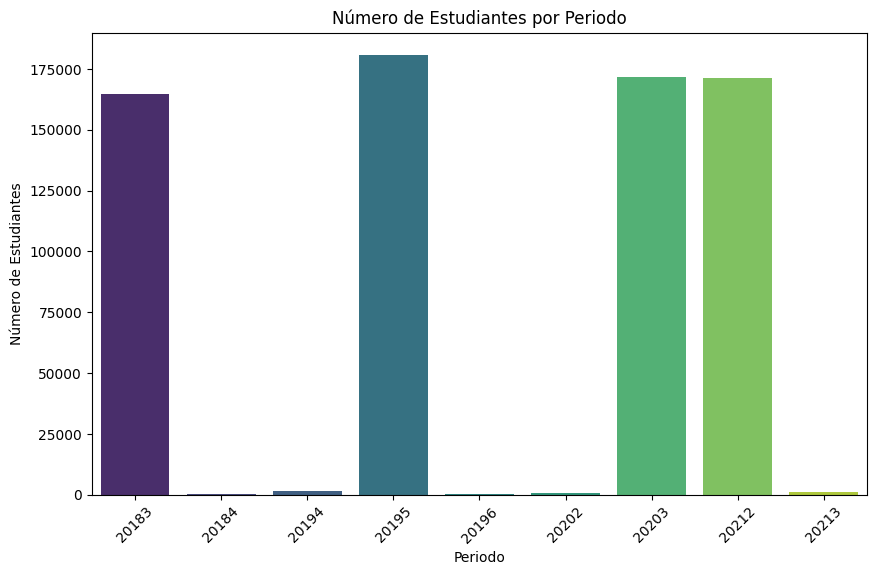

In [ ]:

# Contar el número de estudiantes por periodo
period_counts = train_data['PERIODO'].value_counts().sort_index()

# Crear un DataFrame para la visualización
period_df = period_counts.reset_index()
period_df.columns = ['PERIODO', 'Número de Estudiantes']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=period_df, x='PERIODO', y='Número de Estudiantes', palette='viridis')
plt.title('Número de Estudiantes por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45)
plt.show()


En esta gráfica si puede notar que hay periodos con mucha cantidad de estudiantes y otras practicamente nula, y estan distribubidos 4 / 4 con esa caracteristica.

<ipython-input-24-2d2517911aa2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=department_df, x='Departamento', y='Número de Estudiantes', palette='viridis')


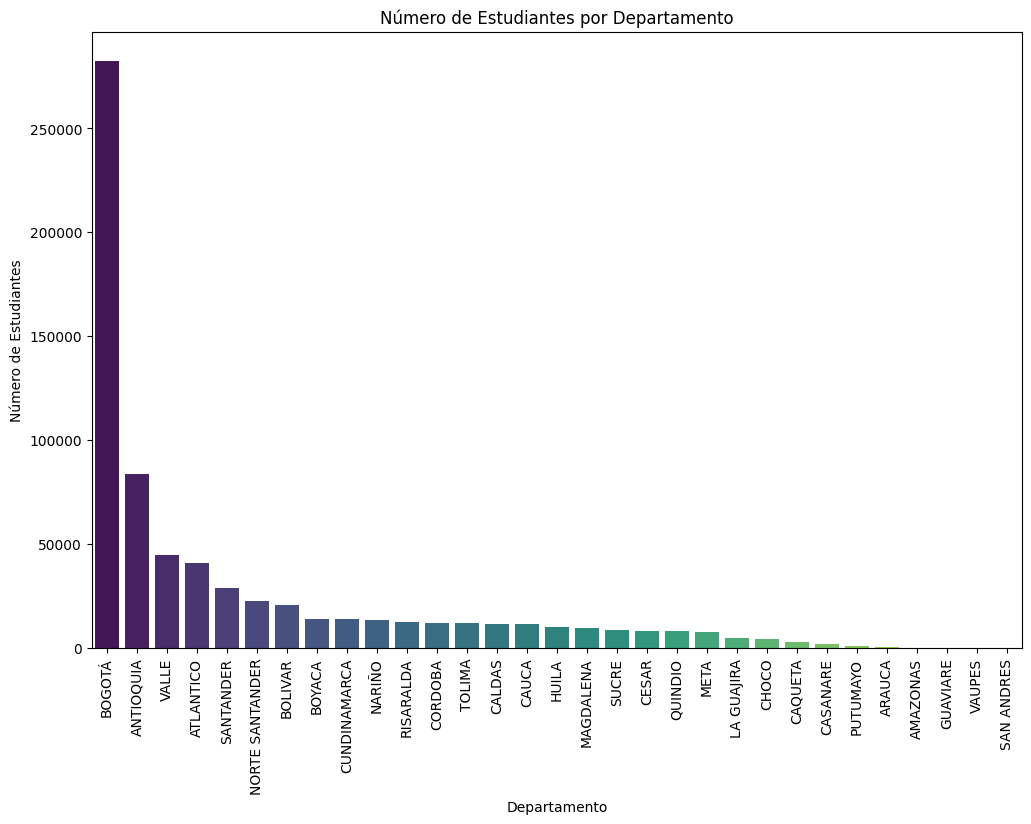

In [ ]:

# Contar el número de estudiantes por departamento
department_counts = train_data['ESTU_PRGM_DEPARTAMENTO'].value_counts()

# Crear un DataFrame para la visualización
department_df = department_counts.reset_index()
department_df.columns = ['Departamento', 'Número de Estudiantes']

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=department_df, x='Departamento', y='Número de Estudiantes', palette='viridis')
plt.title('Número de Estudiantes por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=90)  # Rotar las etiquetas para que se lean mejor
plt.show()


Con este gráfico obtenido podemos notar que la mayoria de los datos son de estudiantes de Bogota.

<ipython-input-27-457caa7c042f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rendimiento_df, x='Rendimiento Global', y='Número de Estudiantes', palette='viridis')


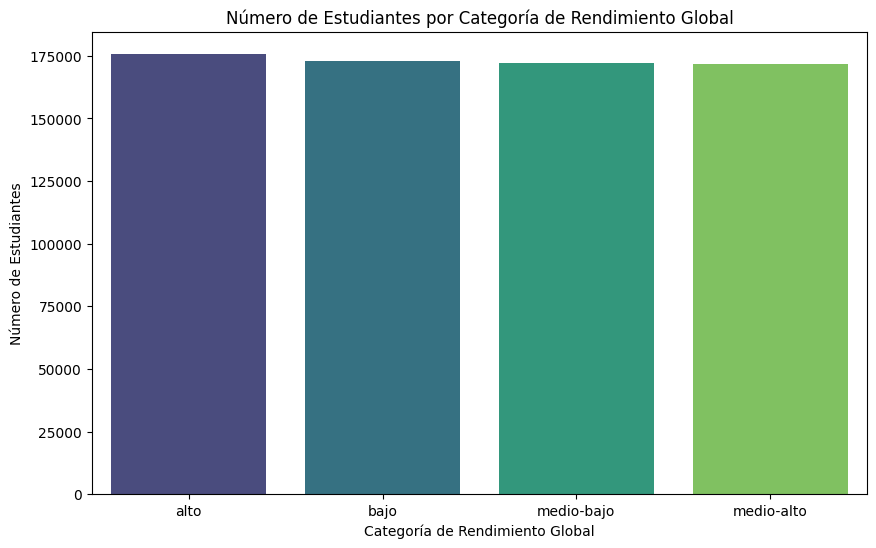

In [ ]:
# Contar el número de estudiantes por categoría de rendimiento global
rendimiento_counts = train_data['RENDIMIENTO_GLOBAL'].value_counts()

# Crear un DataFrame para la visualización
rendimiento_df = rendimiento_counts.reset_index()
rendimiento_df.columns = ['Rendimiento Global', 'Número de Estudiantes']

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=rendimiento_df, x='Rendimiento Global', y='Número de Estudiantes', palette='viridis')
plt.title('Número de Estudiantes por Categoría de Rendimiento Global')
plt.xlabel('Categoría de Rendimiento Global')
plt.ylabel('Número de Estudiantes')
plt.show()

Con este gráfico notamos que la distribución según su calificación es bastante similar y no predomina una como tal.

In [ ]:
# Obtener los programas académicos únicos
unique_programs = train_data['ESTU_PRGM_ACADEMICO'].unique()

# Imprimir los programas académicos únicos
print("Programas Académicos Únicos:")
for program in unique_programs:
    print(program)


Programas Académicos Únicos:
ENFERMERIA
DERECHO
MERCADEO Y PUBLICIDAD
ADMINISTRACION DE EMPRESAS
PSICOLOGIA
MEDICINA VETERINARIA
INGENIERIA MECANICA
ADMINISTRACIÓN EN SALUD OCUPACIONAL
INGENIERIA INDUSTRIAL
ADMINISTRACIÓN FINANCIERA
HOTELERIA Y TURISMO
LICENCIATURA EN CIENCIAS SOCIALES
LICENCIATURA EN PEDAGOGIA INFANTIL
COMUNICACION SOCIAL
CIENCIA POLITICA
PROFESIONAL EN GESTIÓN DE LA SEGURIDAD Y LA SALUD LABORAL
MAESTRO EN MÚSICA
INGENIERIA MECATRONICA
TRABAJO SOCIAL
LICENCIATURA EN BIOLOGIA Y EDUCACION AMBIENTAL
INGENIERIA CIVIL
CONTADURIA PÚBLICA
ADMINISTRACION EN SALUD
ADMINISTRACIÓN DE EMPRESAS
ESTADISTICA
LICENCIATURA EN BIOLOGIA
INGENIERIA AGROINDUSTRIAL
ZOOTECNIA
COMUNICACION AUDIOVISUAL
LICENCIATURA EN EDUCACION BASICA CON ENFASIS EN HUMANIDADES-INGLES
COMUNICACION SOCIAL  - PERIODISMO
SEGURIDAD Y SALUD EN EL TRABAJO
MEDICINA
ADMINISTRACION DE LA SEGURIDAD SOCIAL
CONTADURIA PUBLICA
ODONTOLOGIA
DISEÑO INDUSTRIAL
ECONOMIA
INGENIERIA DE PROCESOS INDUSTRIALES
CONTADURÍA PÚBLICA
IN

In [ ]:
program_categories = {
    'Ciencias': [
        'CIENCIAS DE LA COMPUTACION',
        'MATEMATICAS APLICADAS',
        'QUÍMICA',
        'QUÍMICA FARMACÉUTICA',
        'OCEANOGRAFÍA',
        'LENGUAS MODERNAS Y CULTURA',
        'COMPUTACIÓN CIENTÍFICA',
        'LICENCIATURA EN FÍSICA',
        'LICENCIATURA EN QUÍMICA Y EDUCACIÓN AMBIENTAL'
    ],
    'Ingeniería': [
        'INGENIERÍA URBANA',
        'INGENIERÍA INDUSTRIAL',
        'INGENIERÍA OCEANOGRÁFICA',
        'INGENIERÍA EN TELEMÁTICA',
        'INGENIERIA EN CONTROL Y AUTOMATIZACION INDUSTRIAL',
        'INGENIERÍA DE MATERIALES',
        'INGENIERIA MECATRÓNICA',
        'INGENIERÍA EN AUTOMATIZACION INDUSTRIAL',
        'INGENIERÍA AGROECOLÓGICA',
        'INGENIERÍA EN SEGURIDAD Y SALUD EN EL TRABAJO'
    ],
    'Diseño y Artes': [
        'DISEÑO CROSSMEDIA',
        'DISEÑO Y GESTIÓN DE ESPACIOS',
        'DISEÑO Y REALIZACIÓN DE MEDIOS DIGITALES',
        'COMUNICACIÓN VISUAL Y MULTIMEDIA',
        'PROFESIONAL EN DISEÑO DE VESTUARIO',
        'DISEÑO DE MODAS Y ALTA COSTURA',
        'DISEÑO GRAFICO',
        'DISENO GRAFICO Y MULTIMEDIAL',
        'ARTES PLÁSTICAS',
        'BELLAS ARTES',
        'PROFESIONAL EN ARTES GASTRONOMICAS',
        'GESTIÓN CULTURAL',
        'PROFESIONAL UNIVERSITARIO EN DISEÑO TEXTIL PARA LA INDUSTRIA'
    ],
    'Educación': [
        'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN EDUCACIÓN ARTÍSTICA Y CULTURAL',
        'LICENCIATURA EN EDUCACIÓN BÁSICA PRIMARIA CON ÉNFASIS EN INGLÉS Y EN FRANCÉS',
        'LICENCIATURA EN FILOSOFÍA Y HUMANIDADES',
        'LICENCIATURA EN CIENCIAS NATURALES: FÍSICA QUÍMICA Y BIOLOGÍA',
        'LICENCIATURA EN MÚSICA',
        'LICENCIATURA EN HUMANIDADES',
        'LICENCIATURA EN ESPAÑOL E INGLÉS',
        'LICENCIATURA EN ESPAÑOL Y FILOLOGÍA',
        'LICENCIATURA EN PEDAGOGÍA REEDUCATIVA',
        'LICENCIATURA EN EDUCACION INICIAL',
        'LICENCIATURA EN CIENCIAS SOCIALES',
        'LICENCIATURA EN MATEMÁTICAS',
        'LICENCIATURA EN EDUCACIÓN BÁSICA PRIMARIA CON ÉNFASIS EN CIENCIAS SOCIALES',
        'LICENCIATURA EN EDUCACIÓN BÁSICA CON ÉNFASIS EN EL ÁREA DE TECNOLOGÍA E INFORMÁTICA',
        'LICENCIATURA EN EDUCACIÓN BÁSICA PRIMARIA: ÉNFASIS EN CIENCIAS SOCIALES',
        'LICENCIATURA EN CIENCIAS DE LA EDUCACIÓN',
        'LICENCIATURA EN EDUCACIÓN FÍSICA RECREACIÓN Y DEPORTES',
        'LICENCIATURA EN EDUCACIÓN FÍSICA, DEPORTE Y RECREACIÓN ÉNFASIS RURAL'
    ],
    'Administración y Negocios': [
        'ADMINISTRACIÓN AGROINDUSTRIAL',
        'COMERCIO Y FINANZAS INTERNACIONALES',
        'ADMINISTRACION INFORMATICA',
        'ADMINISTRACION EN NEGOCIOS INTERNACIONALES',
        'ADMINISTRACION DE COMERCIO EXTERIOR',
        'ADMINISTRACION TURISTICA',
        'ADMINISTRACION TECNOLOGICA',
        'ADMINISTRACIÓN DE EMPRESAS TURÍSTICAS POR CICLOS - CICLO PROFESIONAL'
    ],
    'Comunicación y Periodismo': [
        'COMUNICACIÓN CORPORATIVA',
        'COMUNICACIÓN SOCIAL Y PERIODISMO',
        'DIRECCION DE BANDA',
        'TEATRO MUSICAL'
    ],
    'Otros': [
        'PROFESIONAL EN DISEÑO DE MODAS',
        'PROFESIONAL EN PUBLICIDAD Y MERCADEO',
        'PROFESIONAL EN INVESTIGACIÓN CRIMINAL',
        'FORMACION PROFESIONAL EN DEPORTE',
        'PROFESIONAL EN ARTES GASTRONOMICAS',
        'PROFESIONAL EN AGROINDUSTRIA',
        'GESTIÓN DE SISTEMAS DE INFORMACIÓN',
        'QUÍMICA Y FARMACIA',
        'LICENCIATURA EN ARTES ESCÉNICAS'
    ]
}


<ipython-input-38-3f43a0041684>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Program_Category', y='RENDIMIENTO_GLOBAL', palette='viridis')


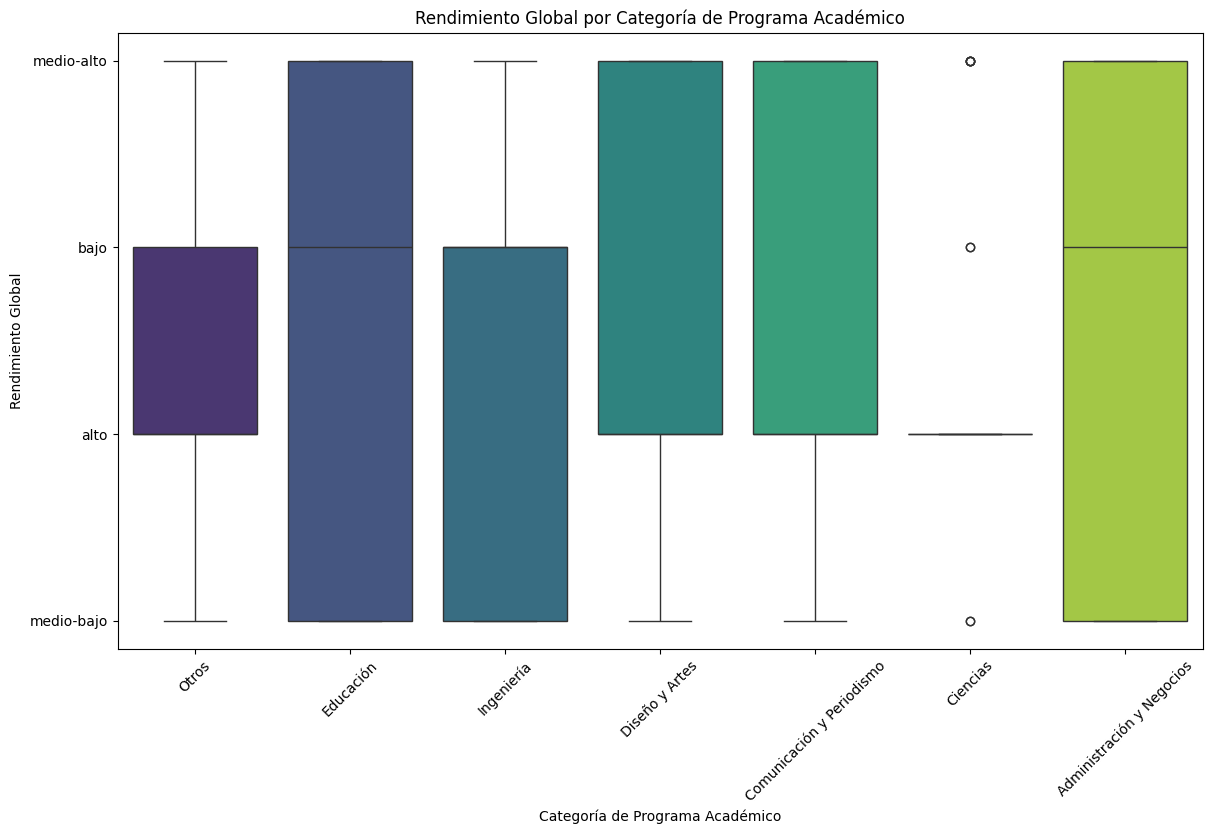

In [ ]:
def categorize_program(program):
    for category, programs in program_categories.items():
        if program in programs:
            return category
    return 'Otros'

train_data['Program_Category'] = train_data['ESTU_PRGM_ACADEMICO'].apply(categorize_program)

# Crear el boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=train_data, x='Program_Category', y='RENDIMIENTO_GLOBAL', palette='viridis')
plt.title('Rendimiento Global por Categoría de Programa Académico')
plt.xlabel('Categoría de Programa Académico')
plt.ylabel('Rendimiento Global')
plt.xticks(rotation=45)
plt.show()


<ipython-input-43-fd32626a36db>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


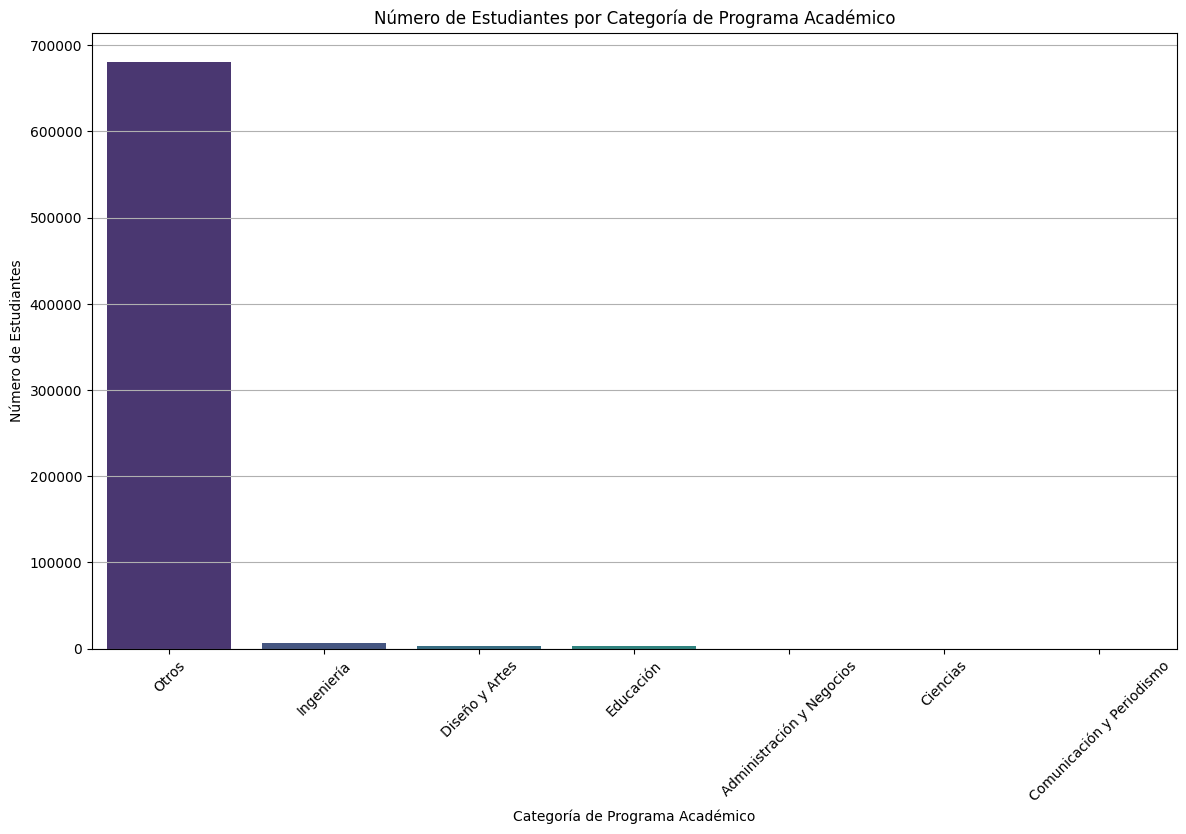

In [ ]:
plt.figure(figsize=(14, 8))

# Contar la cantidad de estudiantes en cada categoría de programa académico
category_counts = train_data['Program_Category'].value_counts()

# Crear el gráfico de barras
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Número de Estudiantes por Categoría de Programa Académico')
plt.xlabel('Categoría de Programa Académico')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


<ipython-input-42-7a7e05a87306>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='viridis')


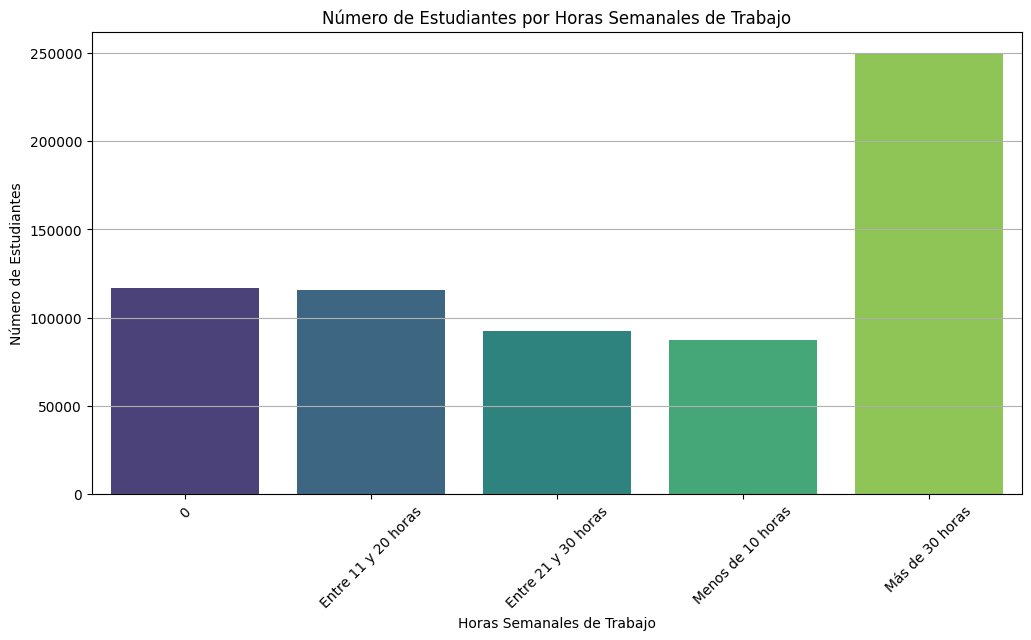

In [ ]:
plt.figure(figsize=(12, 6))

# Primero, agrupamos los datos por la cantidad de horas y contamos el número de estudiantes en cada grupo
hour_counts = train_data['ESTU_HORASSEMANATRABAJA'].value_counts().sort_index()

# Luego, creamos el gráfico de barras
sns.barplot(x=hour_counts.index, y=hour_counts.values, palette='viridis')
plt.title('Número de Estudiantes por Horas Semanales de Trabajo')
plt.xlabel('Horas Semanales de Trabajo')
plt.ylabel('Número de Estudiantes')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


Acá se realizo una categorización según la cantidad de horas que trabajan los estudiantes, predominando más de 30 horas.

<ipython-input-44-3097120a74b2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='ESTU_HORASSEMANATRABAJA', y='RENDIMIENTO_GLOBAL', palette='viridis')


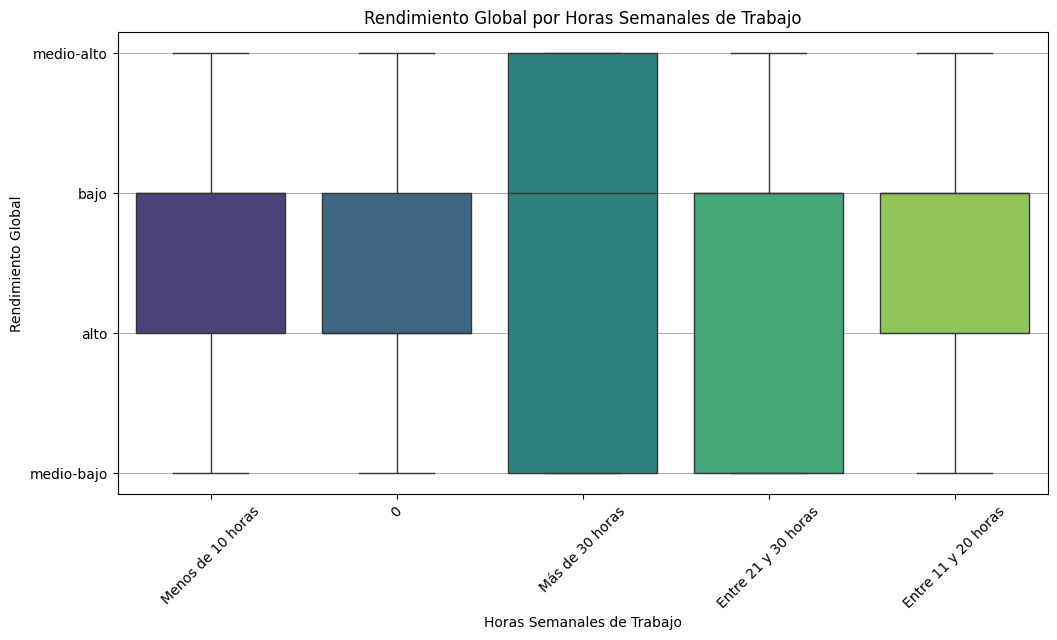

In [ ]:
plt.figure(figsize=(12, 6))

# Crear el boxplot
sns.boxplot(data=train_data, x='ESTU_HORASSEMANATRABAJA', y='RENDIMIENTO_GLOBAL', palette='viridis')
plt.title('Rendimiento Global por Horas Semanales de Trabajo')
plt.xlabel('Horas Semanales de Trabajo')
plt.ylabel('Rendimiento Global')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


Luego de hacer el histograma no fue concluyente una influencia directa entre los estudiantes que trabajan con respecto a su rendimiento.

<ipython-input-48-ed7ddf6edca4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=train_data, x='FAMI_ESTRATOVIVIENDA', y='RENDIMIENTO_GLOBAL', palette='viridis')


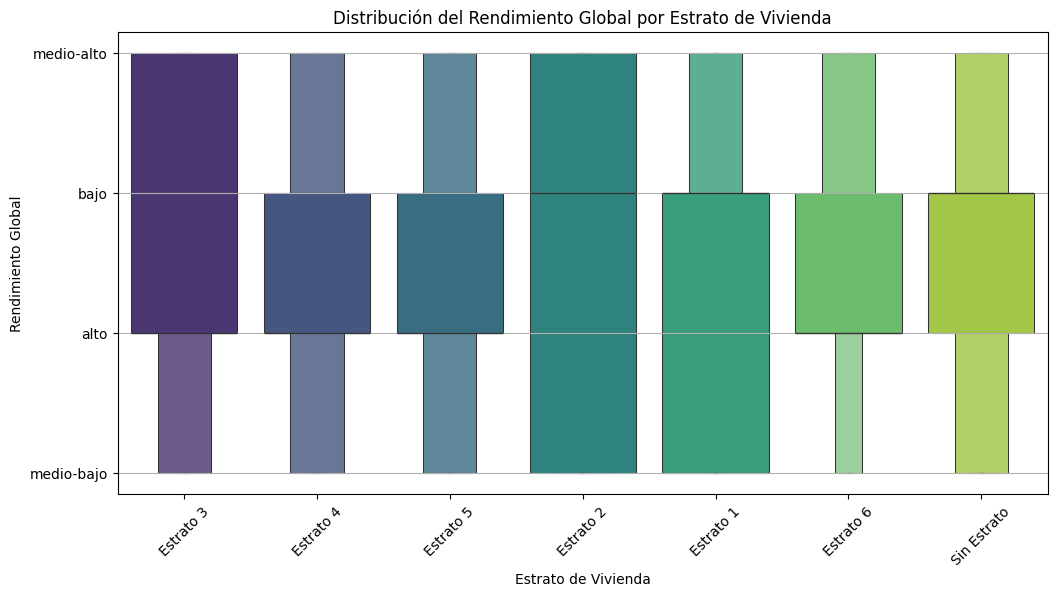

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=train_data, x='FAMI_ESTRATOVIVIENDA', y='RENDIMIENTO_GLOBAL', palette='viridis')
plt.title('Distribución del Rendimiento Global por Estrato de Vivienda')
plt.xlabel('Estrato de Vivienda')
plt.ylabel('Rendimiento Global')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Luego se realizo el analisís con respecto a a al estrato socioeconomico de cada estudiante, pero tampoco se obtuvo un resultado concluyente.

In [ ]:


estrato_rendimiento_counts = train_data.groupby('FAMI_ESTRATOVIVIENDA')['RENDIMIENTO_GLOBAL'].value_counts().unstack().fillna(0)

# Renombrar las columnas para mayor claridad
estrato_rendimiento_counts.columns = ['Rendimiento Bajo', 'Rendimiento Medio-Bajo', 'Rendimiento Medio-Alto', 'Rendimiento Alto']

# Configurar pandas para mostrar más columnas y filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)      # Mostrar las columnas

# Ver las primeras filas del DataFrame
estrato_rendimiento_counts





,Rendimiento Bajo,Rendimiento Medio-Bajo,Rendimiento Medio-Alto,Rendimiento Alto
FAMI_ESTRATOVIVIENDA,,,,
Estrato 1,14363,42388,23643,31597
Estrato 2,45948,63068,59536,64119
Estrato 3,59121,42756,56841,51967
Estrato 4,28624,9064,16154,11672
Estrato 5,12415,2731,5112,3350
Estrato 6,7648,1287,2314,1356
Sin Estrato,588,1436,579,686


In [ ]:
# Contar cuántos estudiantes en cada rango de horas semanales de trabajo tuvieron cada nivel de rendimiento
horas_rendimiento_counts = train_data.groupby('ESTU_HORASSEMANATRABAJA')['RENDIMIENTO_GLOBAL'].value_counts().unstack().fillna(0)

# Renombrar las columnas para mayor claridad
horas_rendimiento_counts.columns = ['Rendimiento Bajo', 'Rendimiento Medio-Bajo', 'Rendimiento Medio-Alto', 'Rendimiento Alto']

# Configurar pandas para mostrar más columnas y filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)      # Mostrar todas las filas

# Ver el DataFrame
horas_rendimiento_counts


,Rendimiento Bajo,Rendimiento Medio-Bajo,Rendimiento Medio-Alto,Rendimiento Alto
ESTU_HORASSEMANATRABAJA,,,,
0,45754,18959,28900,22937
Entre 11 y 20 horas,27554,32019,27400,28884
Entre 21 y 30 horas,20926,24483,22968,24316
Menos de 10 horas,23358,25434,18757,19642
Más de 30 horas,50989,62742,66102,69519


In [ ]:


# Contar cuántos estudiantes con y sin internet tuvieron cada nivel de rendimiento
internet_rendimiento_counts = train_data.groupby('FAMI_TIENEINTERNET')['RENDIMIENTO_GLOBAL'].value_counts().unstack().fillna(0)

# Renombrar las columnas para mayor claridad
internet_rendimiento_counts.columns = ['Rendimiento Bajo', 'Rendimiento Medio-Bajo', 'Rendimiento Medio-Alto', 'Rendimiento Alto']

# Configurar pandas para mostrar más columnas y filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)      # Mostrar todas las filas

# Ver el DataFrame
internet_rendimiento_counts


,Rendimiento Bajo,Rendimiento Medio-Bajo,Rendimiento Medio-Alto,Rendimiento Alto
FAMI_TIENEINTERNET,,,,
No,8480,28916,14944,21017
Si,161158,135689,150374,145293


In [ ]:
# Contar cuántos estudiantes en cada periodo tuvieron cada nivel de rendimiento
periodo_rendimiento_counts = train_data.groupby('PERIODO')['RENDIMIENTO_GLOBAL'].value_counts().unstack().fillna(0)

# Renombrar las columnas para mayor claridad
periodo_rendimiento_counts.columns = ['Rendimiento Bajo', 'Rendimiento Medio-Bajo', 'Rendimiento Medio-Alto', 'Rendimiento Alto']

# Configurar pandas para mostrar más columnas y filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)      # Mostrar todas las filas

# Ver el DataFrame
periodo_rendimiento_counts

,Rendimiento Bajo,Rendimiento Medio-Bajo,Rendimiento Medio-Alto,Rendimiento Alto
PERIODO,,,,
20183,44533,35650,41720,42915
20184,58,72,53,71
20194,816,88,357,211
20195,41275,45253,45665,48680
20196,31,33,54,47
20202,257,48,113,72
20203,48648,40543,43612,39035
20212,39488,51103,39763,41058
20213,513,197,282,186


In [ ]:
# Contar cuántos estudiantes con cada forma de pago de matrícula tuvieron cada nivel de rendimiento
pago_rendimiento_counts = train_data.groupby('ESTU_PAGOMATRICULAPROPIO')['RENDIMIENTO_GLOBAL'].value_counts().unstack().fillna(0)

# Renombrar las columnas para mayor claridad
pago_rendimiento_counts.columns = ['Rendimiento Bajo', 'Rendimiento Medio-Bajo', 'Rendimiento Medio-Alto', 'Rendimiento Alto']

# Configurar pandas para mostrar más columnas y filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)      # Mostrar todas las filas

# Ver el DataFram
pago_rendimiento_counts

,Rendimiento Bajo,Rendimiento Medio-Bajo,Rendimiento Medio-Alto,Rendimiento Alto
ESTU_PAGOMATRICULAPROPIO,,,,
No,123072,76324,97507,85298
Si,50215,95386,72571,85629


In [ ]:
# Contar cuántos estudiantes en cada departamento tuvieron cada nivel de rendimiento
departamento_rendimiento_counts = train_data.groupby('ESTU_PRGM_DEPARTAMENTO')['RENDIMIENTO_GLOBAL'].value_counts().unstack().fillna(0)

# Renombrar las columnas para mayor claridad
departamento_rendimiento_counts.columns = ['Rendimiento Bajo', 'Rendimiento Medio-Bajo', 'Rendimiento Medio-Alto', 'Rendimiento Alto']

# Configurar pandas para mostrar más columnas y filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', None)      # Mostrar todas las filas

# Ver el DataFrame
departamento_rendimiento_counts

,Rendimiento Bajo,Rendimiento Medio-Bajo,Rendimiento Medio-Alto,Rendimiento Alto
ESTU_PRGM_DEPARTAMENTO,,,,
AMAZONAS,1.0,17.0,6.0,16.0
ANTIOQUIA,25688.0,17217.0,21657.0,19045.0
ARAUCA,33.0,283.0,92.0,181.0
ATLANTICO,10165.0,11159.0,9484.0,10212.0
BOGOTÁ,77388.0,66721.0,69215.0,68835.0
BOLIVAR,3816.0,6577.0,4758.0,5478.0
BOYACA,3770.0,2338.0,4440.0,3500.0
CALDAS,3751.0,1916.0,3313.0,2660.0
CAQUETA,283.0,979.0,568.0,829.0
